# Clustering with K-Means Algorithm

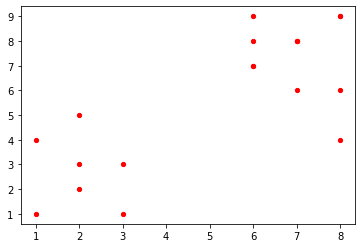

In [2]:
# Load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("kmeans.csv")

plt.scatter(df['x'],df['y'], c='r', s=18)
plt.show()

# In this case, the x and y are on the same range. We will skip scaling. 

In [3]:
#create a 2D array containing all features-
X = np.array(list(zip(df['x'],df['y'])))

# build the model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X) # train the model

In [4]:
# use the trained model to find the clusters for each case

labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[0 0 0 0 0 1 1 1 2 1 0 1 1 1 1 0 2 2 1]
[[2.         2.71428571]
 [6.77777778 8.11111111]
 [7.66666667 5.33333333]]


In [5]:
# re-plot the cases with the labels
c = ['b', 'r', 'g']
colors = []
for i in labels:
    colors.append(c[i]) 
print(colors)

['b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'g', 'r', 'b', 'r', 'r', 'r', 'r', 'b', 'g', 'g', 'r']


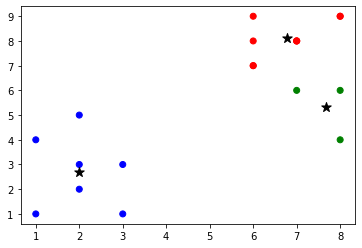

In [6]:
plt.scatter(df['x'],df['y'], c=colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
plt.show()

In [8]:
cluster = kmeans.predict([[3,4]])
print(cluster)

[0]


In [18]:
# Choosing the optimal k.
# Method 1: Elbow method

# Create a list to hold the Error Sum of Squares (SSE)
# which is the sum of the squared differences between each observation and its group's mean
sse = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [19]:
print(sse)

[258.63157894736844, 50.345238095238095, 31.206349206349206, 21.194444444444446, 15.900000000000002, 12.5, 9.238095238095239, 6.666666666666667, 4.833333333333334, 3.5]


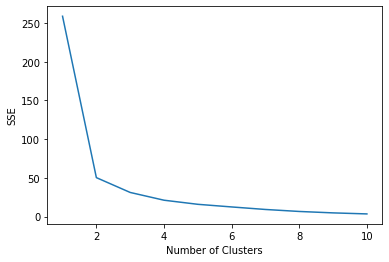

In [20]:
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
# If it is hard to decide whether 3, 4, or 5 is the best number,
# we could use a method KneeLocator from the package kneed. 

import kneed

ks = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
ks.elbow

2

In [17]:
# Finding the best k using the Silhouette Coefficient
from sklearn import metrics
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_)
    sil.append(score)
    print(k, " ", score )

2   0.6897112069939448
3   0.5578051985195768
4   0.4430381814640289
5   0.4424248576948773
6   0.4202812803017777
7   0.38650416544593347
8   0.45192547478167977
9   0.44437330649476303
10   0.5124113408422506


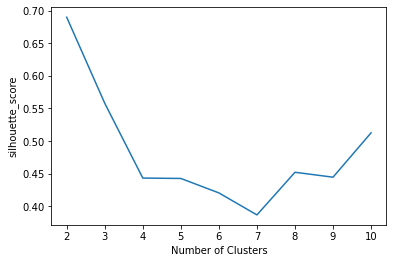

In [22]:
plt.plot(range(2, 11), sil)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_score")
plt.show()